# Gradient Boosting Machine

This jupyter notebook has been made with purpose to practice Gradient Boosting Machine

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('dark_background')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

## Functions

## DF_1

In [ ]:
! gdown --id 1nRvW9Wb4PuxkM772gWVV55FxqG3QZ7bX

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nRvW9Wb4PuxkM772gWVV55FxqG3QZ7bX
To: /content/Titanic-Dataset.csv
100% 61.2k/61.2k [00:00<00:00, 22.7MB/s]


In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv', index_col='PassengerId')
df=df.drop(['Name', 'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


In [ ]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [ ]:
df=df.drop('Cabin', axis=1)

In [ ]:
for j in range(1, len(df.columns)):
  if df[df.columns[j]].dtype=='object':
    df[df.columns[j]]=pd.Categorical(df[df.columns[j]])
    df[df.columns[j]]=df[df.columns[j]].cat.codes
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.529742
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.800254
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Cleaning data

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


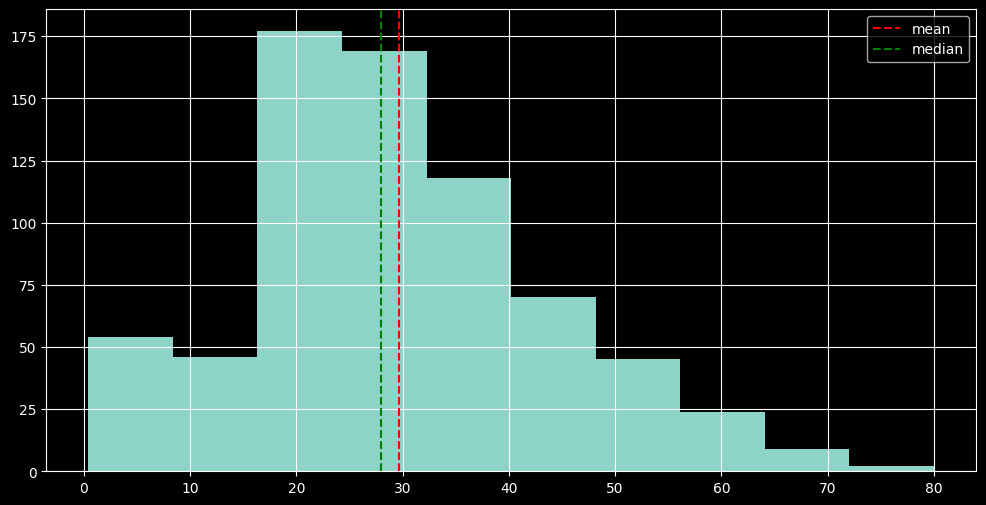

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
df['Age'].hist(ax=ax)
ax.axvline(x=df['Age'].mean(), color='r', label='mean', linestyle='--')
ax.axvline(x=df['Age'].median(), color='g', label='median', linestyle='--')
plt.legend()
plt.show()

In [ ]:
gbm_r = GradientBoostingRegressor(random_state=42)
parameteres = {'learning_rate': [0.2, 0.1, 0.05, 0.01],
               'n_estimators': [30, 50, 100, 150],
               'max_depth': [3, 5, 10, 15],
               'min_samples_leaf': [1, 3, 5]}
filling_age = GridSearchCV(gbm_r, parameteres, n_jobs=-1)
filling_age.fit(df.dropna().drop('Age', axis=1), df.dropna()['Age'])
df.loc[df['Age'].isna(), 'Age'] = filling_age.predict(df.loc[df['Age'].isna()].drop('Age', axis=1))

<Axes: >

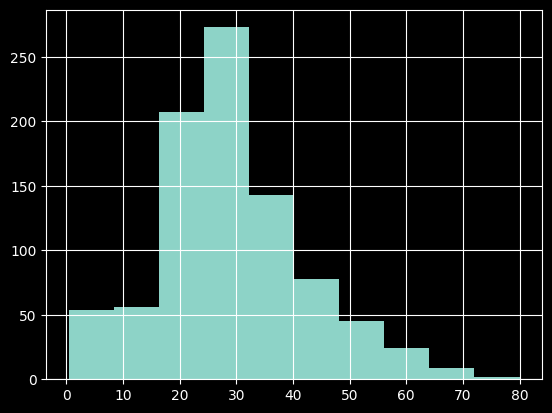

In [ ]:
df['Age'].hist()

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df['Age']=df['Age'].apply(lambda x: round(x))

### Model

In [ ]:
X=df.drop('Survived', axis=1).copy()
y=df['Survived'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
gbm_c=GradientBoostingClassifier(random_state=42)
parameteres={'learning_rate': [0.2, 0.1, 0.05, 0.01],
             'n_estimators': [30, 50, 100, 150],
             'max_depth': [3, 5, 10, 15],
             'min_samples_leaf': [1, 3, 5]}
model=GridSearchCV(gbm_c, parameteres, n_jobs=-1)
model.fit(X_train, y_train)
print(f"accuracy for train set: {model.score(X_train, y_train)}")
print("")
print(f"accuracy for test set: {model.score(X_test, y_test)}")

accuracy for train set: 0.9073033707865169

accuracy for test set: 0.8491620111731844
